**Anggota Kelompok 4:**

**Nadia Nafista (23031554095)**

**Eunike Melani Waluyo (23031554104)**

**Gesang Nur Zamroji (23031554145)**



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from PIL import Image

In [ ]:
import os
from collections import defaultdict

dataset_path = r"D:\ProjectAkhir_PCD\BrainTumorYolov11"

subsets = ["train", "valid", "test"]

class_counts = {subset: defaultdict(int) for subset in subsets}

for subset in subsets:
    label_folder = os.path.join(dataset_path, subset, "labels")
    label_files = os.listdir(label_folder)

    for label_file in label_files:
        label_path = os.path.join(label_folder, label_file)

        with open(label_path, "r") as f:
            for line in f.readlines():
                class_id = int(line.strip().split()[0])
                class_counts[subset][class_id] += 1

for subset in subsets:
    print(f"\nJumlah data per kelas di {subset}:")
    for class_id, count in sorted(class_counts[subset].items()):
        print(f"  Class {class_id}: {count} samples")



Jumlah data per kelas di train:
  Class 0: 983 samples
  Class 1: 503 samples
  Class 2: 658 samples

Jumlah data per kelas di valid:
  Class 0: 285 samples
  Class 1: 142 samples
  Class 2: 185 samples

Jumlah data per kelas di test:
  Class 0: 159 samples
  Class 1: 62 samples
  Class 2: 87 samples


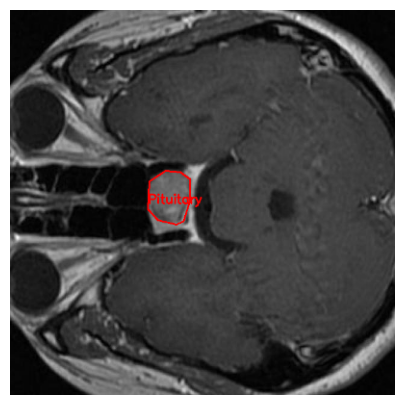

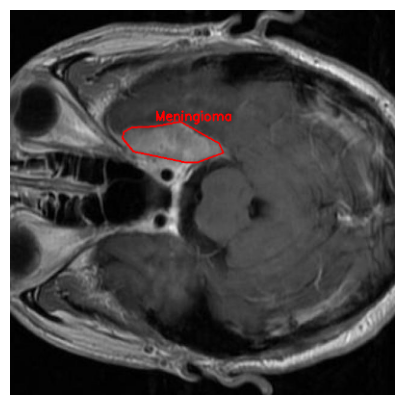

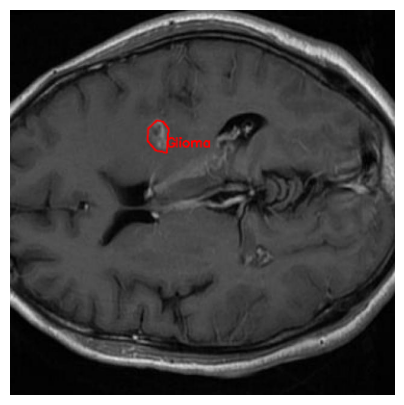

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

dataset_path = r"D:\ProjectAkhir_PCD\BrainTumorYolov11\valid"
image_folder = os.path.join(dataset_path, "images")
label_folder = os.path.join(dataset_path, "labels")

class_names = ["Glioma", "Meningioma", "Pituitary"]

selected_images = {}

image_files = os.listdir(image_folder)[:300]

for img_file in image_files:
    if len(selected_images) == 3:
        break

    img_path = os.path.join(image_folder, img_file)
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join(label_folder, label_file)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            first_line = f.readline().strip().split()
            class_id = int(first_line[0])

            if class_id not in selected_images:
                selected_images[class_id] = (img_path, label_path)

for class_id, (img_path, label_path) in selected_images.items():
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        for line in f.readlines():
            data = line.strip().split()
            polygon = np.array(data[1:], dtype=np.float32).reshape(-1, 2)

            polygon[:, 0] *= w
            polygon[:, 1] *= h
            polygon = polygon.astype(np.int32)

            cv2.polylines(img, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)
            cv2.putText(img, f"{class_names[class_id]}", (polygon[0][0], polygon[0][1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    img = cv2.resize(img, (400, 400))

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [ ]:
!pip install ultralytics

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 12.2 MB/s eta 0:00:00

   -------------------- ------------------- 2/4 [ultralytics-thop]
   ------------------------------ --------- 3/4 [ultralytics]
   ------------------------------ --------- 3/4 [ultralytics]
   ------------------------------ --------- 3/4 [ultralytics]
   ------------------------------ --------- 3/4 [ultralytics]
   ------------------------------ --------- 3/4 [ultralytics]
   ------------------------------ --------- 3/4 [ultralytics]
   ------------------------------ --------- 3/4 [ultralytics]
   ---------------------------------------- 4/4 [ultralytics]



# Training Model YOLOv11


  
 imgsz=256 ==> melakukan resizing image menjadi 256x256

 augment=True ==> augmentasi data untuk pelatihan



In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

## epoch 5

In [ ]:
results = model.train(
    data=r'D:\ProjectAkhir_PCD\BrainTumorYolov11\data.yaml',
    imgsz=256,
    epochs=5,
    batch=4,
    device='cpu',
    augment=True,
    project='runs/train_augmented',
    name='yolov11_augmented'
)

Ultralytics 8.3.133  Python-3.12.5 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\BrainTumor\BrainTumorYolov11\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_augmented, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

train: Scanning D:\BrainTumor\BrainTumorYolov11\train\labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.10.0 ms, read: 55.743.7 MB/s, size: 34.0 KB)


val: Scanning D:\BrainTumor\BrainTumorYolov11\valid\labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]

Plotting labels to runs\train_augmented\yolov11_augmented\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\train_augmented\yolov11_augmented
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.253      1.454      1.193          6        256: 100%|██████████| 536/536 [05:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:44<00:00,  1.74it/s]

                   all        612        612      0.743      0.658      0.751      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.266       1.43      1.198         11        256: 100%|██████████| 536/536 [04:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:27<00:00,  2.83it/s]

                   all        612        612      0.792      0.651       0.75      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.248      1.384      1.186          3        256: 100%|██████████| 536/536 [04:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:31<00:00,  2.46it/s]

                   all        612        612      0.763      0.724      0.777      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.199      1.303      1.171          9        256: 100%|██████████| 536/536 [04:36<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:31<00:00,  2.45it/s]

                   all        612        612      0.783      0.734      0.796      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.178      1.216      1.153          7        256: 100%|██████████| 536/536 [05:58<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:33<00:00,  2.27it/s]

                   all        612        612      0.799      0.789      0.837      0.597



5 epochs completed in 0.470 hours.
Optimizer stripped from runs\train_augmented\yolov11_augmented\weights\last.pt, 5.4MB
Optimizer stripped from runs\train_augmented\yolov11_augmented\weights\best.pt, 5.4MB

Validating runs\train_augmented\yolov11_augmented\weights\best.pt...
Ultralytics 8.3.133  Python-3.12.5 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:01<00:00,  1.26it/s]


                   all        612        612      0.804      0.774      0.837      0.606
                glioma        285        285      0.692      0.576      0.675      0.424
            meningioma        142        142      0.884      0.866      0.929      0.739
             pituitary        185        185      0.836      0.881      0.908      0.654
Speed: 0.5ms preprocess, 87.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\train_augmented\yolov11_augmented


## epoch 10

In [ ]:
results = model.train(
    data=r'D:\ProjectAkhir_PCD\BrainTumorYolov11\data.yaml',
    imgsz=256,
    epochs=10,
    batch=4,
    device='cpu',
    augment=True,
    project='runs/train_augmented',
    name='yolov11_augmented'
)

Ultralytics 8.3.143  Python-3.13.2 torch-2.7.0+cpu CPU (12th Gen Intel Core(TM) i5-12450HX)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\\pemdas\PERPUS\Semester 4\PCD\BrainTumorYolov11-20250523T134747Z-1-001\BrainTumorYolov11\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_augmented, nbs=64, nms=False, opset=None, optimize=False, optimize

train: Scanning C:\ドキュメント\pemdas\PERPUS\Semester 4\PCD\BrainTumorYolov11-20250523T134747Z-1-001\BrainTumorYolov11\train\labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.10.0 ms, read: 66.07.4 MB/s, size: 34.0 KB)



C:\Users\NADIA\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\ドキュメント\pemdas\PERPUS\Semester 4\PCD\BrainTumorYolov11-20250523T134747Z-1-001\BrainTumorYolov11\valid\labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
C:\Users\NADIA\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\train_augmented\yolov11_augmented\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\train_augmented\yolov11_augmented
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


C:\Users\NADIA\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
       1/10         0G      1.304      1.708      1.211          4        256: 100%|██████████| 536/536 [03:57<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.81it/s]

                   all        612        612      0.642      0.614      0.673      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.302      1.591      1.205          4        256: 100%|██████████| 536/536 [03:36<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.82it/s]


                   all        612        612      0.702      0.656      0.705       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.315      1.546      1.234          4        256: 100%|██████████| 536/536 [03:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.80it/s]

                   all        612        612      0.737       0.66      0.734      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.295      1.428      1.228          4        256: 100%|██████████| 536/536 [03:34<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.84it/s]


                   all        612        612      0.713      0.686      0.748      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.241      1.313      1.196          4        256: 100%|██████████| 536/536 [03:29<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:19<00:00,  3.89it/s]

                   all        612        612      0.717      0.748      0.792      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.213      1.203      1.181          4        256: 100%|██████████| 536/536 [03:36<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:19<00:00,  3.91it/s]

                   all        612        612      0.796      0.759      0.811      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.144      1.134      1.151          4        256: 100%|██████████| 536/536 [03:52<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:40<00:00,  1.91it/s]

                   all        612        612      0.831      0.796      0.859      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.102      1.048      1.114          4        256: 100%|██████████| 536/536 [04:53<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:19<00:00,  4.05it/s]

                   all        612        612       0.81      0.793      0.849      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.066     0.9774      1.093          4        256: 100%|██████████| 536/536 [03:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:17<00:00,  4.45it/s]

                   all        612        612      0.834      0.816      0.868      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.021     0.9061      1.077          4        256: 100%|██████████| 536/536 [03:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:16<00:00,  4.64it/s]

                   all        612        612      0.878      0.781      0.879       0.65



10 epochs completed in 0.682 hours.
Optimizer stripped from runs\train_augmented\yolov11_augmented\weights\last.pt, 5.4MB
Optimizer stripped from runs\train_augmented\yolov11_augmented\weights\best.pt, 5.4MB

Validating runs\train_augmented\yolov11_augmented\weights\best.pt...
Ultralytics 8.3.143  Python-3.13.2 torch-2.7.0+cpu CPU (12th Gen Intel Core(TM) i5-12450HX)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:35<00:00,  2.14it/s]


                   all        612        612      0.846      0.794      0.879      0.651
                glioma        285        285      0.773      0.589      0.746       0.48
            meningioma        142        142      0.881      0.923      0.952      0.781
             pituitary        185        185      0.885      0.869       0.94      0.691
Speed: 0.2ms preprocess, 54.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\train_augmented\yolov11_augmented


## epoch 50

In [ ]:
results = model.train(
    data=r'D:\ProjectAkhir_PCD\BrainTumorYolov11\data.yaml',
    imgsz=256,
    epochs=50,
    batch=4,
    device='cpu',
    augment=True,
    project='runs/detect',
    name='train_augmented_5de0epoch2'
)

New https://pypi.org/project/ultralytics/8.3.151 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.133  Python-3.12.5 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\ProjectAkhir_PCD\BrainTumorYolov11\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_augmented_5de0

train: Scanning D:\ProjectAkhir_PCD\BrainTumorYolov11\train\labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:04<00:00, 513.34it/s]


train: New cache created: D:\ProjectAkhir_PCD\BrainTumorYolov11\train\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.60.2 ms, read: 32.715.6 MB/s, size: 34.0 KB)


val: Scanning D:\ProjectAkhir_PCD\BrainTumorYolov11\valid\labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:01<00:00, 382.18it/s]


val: New cache created: D:\ProjectAkhir_PCD\BrainTumorYolov11\valid\labels.cache
Plotting labels to runs\detect\train_augmented_5de0epoch2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\detect\train_augmented_5de0epoch2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.602      2.979      1.353          6        256: 100%|██████████| 536/536 [03:37<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:40<00:00,  1.90it/s]

                   all        612        612      0.481      0.495      0.471      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.567      2.094       1.33         11        256: 100%|██████████| 536/536 [03:18<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.41it/s]


                   all        612        612      0.473      0.576      0.459      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.57      1.941      1.337          3        256: 100%|██████████| 536/536 [02:46<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.74it/s]


                   all        612        612      0.564      0.617      0.618      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.477      1.766      1.318          9        256: 100%|██████████| 536/536 [03:33<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:31<00:00,  2.46it/s]

                   all        612        612      0.683      0.615      0.659      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.429       1.61      1.283          7        256: 100%|██████████| 536/536 [38:06<00:00,  4.27s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:27<00:00,  2.79it/s]


                   all        612        612      0.655      0.579      0.632      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.401      1.584      1.257          3        256: 100%|██████████| 536/536 [02:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:19<00:00,  3.94it/s]

                   all        612        612      0.662      0.696      0.716      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.391      1.501      1.261          8        256: 100%|██████████| 536/536 [02:45<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:19<00:00,  3.94it/s]

                   all        612        612      0.724      0.707      0.755       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.352      1.458      1.238          9        256: 100%|██████████| 536/536 [02:47<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:19<00:00,  3.87it/s]

                   all        612        612      0.754       0.74      0.777      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.351        1.4      1.232          4        256: 100%|██████████| 536/536 [37:25<00:00,  4.19s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.63it/s]

                   all        612        612      0.725      0.718      0.761      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.341      1.372      1.238         10        256: 100%|██████████| 536/536 [02:57<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:28<00:00,  2.67it/s]

                   all        612        612      0.788      0.717      0.798      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G       1.32      1.379      1.228          7        256: 100%|██████████| 536/536 [03:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.36it/s]

                   all        612        612      0.699      0.733      0.771      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.29      1.321      1.204          7        256: 100%|██████████| 536/536 [03:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.41it/s]

                   all        612        612      0.786      0.744      0.808       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.275      1.269      1.198          5        256: 100%|██████████| 536/536 [03:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.42it/s]

                   all        612        612       0.78      0.772      0.818      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.282      1.245      1.208          3        256: 100%|██████████| 536/536 [03:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.33it/s]

                   all        612        612       0.78      0.749      0.811      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G       1.29      1.266      1.207         10        256: 100%|██████████| 536/536 [03:24<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.53it/s]

                   all        612        612      0.824      0.772      0.831      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.247      1.225      1.188          5        256: 100%|██████████| 536/536 [03:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.38it/s]

                   all        612        612      0.746      0.769        0.8      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.203      1.153      1.178          8        256: 100%|██████████| 536/536 [03:37<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.36it/s]

                   all        612        612      0.836      0.775      0.831        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.206       1.17      1.156         10        256: 100%|██████████| 536/536 [03:17<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.27it/s]

                   all        612        612      0.793      0.749      0.807      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.22      1.142       1.17          5        256: 100%|██████████| 536/536 [03:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.39it/s]

                   all        612        612      0.829      0.789      0.845      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.222      1.133       1.18          9        256: 100%|██████████| 536/536 [03:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.46it/s]

                   all        612        612      0.812      0.786      0.837      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.201      1.116       1.16          5        256: 100%|██████████| 536/536 [03:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.26it/s]

                   all        612        612      0.824      0.781      0.843      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.209      1.135      1.167          5        256: 100%|██████████| 536/536 [03:23<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.48it/s]


                   all        612        612      0.822      0.794      0.853      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.187      1.084      1.153          3        256: 100%|██████████| 536/536 [03:20<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.30it/s]

                   all        612        612       0.87      0.787      0.863      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.174      1.074      1.151          6        256: 100%|██████████| 536/536 [03:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.30it/s]

                   all        612        612      0.826      0.817      0.864       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.165      1.073      1.144          4        256: 100%|██████████| 536/536 [03:31<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.46it/s]

                   all        612        612      0.827      0.819      0.867       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.181      1.064      1.157          3        256: 100%|██████████| 536/536 [02:56<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.71it/s]

                   all        612        612      0.843      0.813      0.878      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.138      1.029      1.137          4        256: 100%|██████████| 536/536 [02:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.76it/s]

                   all        612        612       0.85       0.84      0.884      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.127       1.02      1.129          5        256: 100%|██████████| 536/536 [02:50<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.77it/s]

                   all        612        612      0.836      0.797      0.853      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.136      1.014      1.122          5        256: 100%|██████████| 536/536 [14:07<00:00,  1.58s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.80it/s]

                   all        612        612      0.871      0.767      0.864      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G       1.13     0.9791      1.118          5        256: 100%|██████████| 536/536 [02:51<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.75it/s]

                   all        612        612      0.853      0.818       0.88      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.116      0.976      1.119          9        256: 100%|██████████| 536/536 [02:52<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.69it/s]

                   all        612        612      0.866      0.811       0.88      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G       1.11     0.9587      1.119          7        256: 100%|██████████| 536/536 [1:04:14<00:00,  7.19s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.81it/s]

                   all        612        612      0.857      0.844      0.891      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.118     0.9698      1.126          5        256: 100%|██████████| 536/536 [05:45<00:00,  1.55it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.36it/s]


                   all        612        612      0.839      0.827      0.875      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.069     0.9054      1.103          5        256: 100%|██████████| 536/536 [03:10<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.46it/s]

                   all        612        612      0.866      0.829      0.882      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.077     0.9548      1.103          7        256: 100%|██████████| 536/536 [02:59<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.81it/s]

                   all        612        612      0.857       0.83      0.882      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.082      0.925      1.104          7        256: 100%|██████████| 536/536 [02:50<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.81it/s]

                   all        612        612      0.868      0.827      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.078     0.9398      1.099          9        256: 100%|██████████| 536/536 [02:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.79it/s]

                   all        612        612      0.856      0.838      0.884      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.076     0.9201      1.107          9        256: 100%|██████████| 536/536 [1:03:49<00:00,  7.15s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:27<00:00,  2.84it/s]

                   all        612        612      0.881      0.831      0.894      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.057     0.8856      1.088         10        256: 100%|██████████| 536/536 [31:33<00:00,  3.53s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.66it/s]

                   all        612        612      0.861      0.845      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.042     0.8597      1.087          5        256: 100%|██████████| 536/536 [02:55<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.79it/s]

                   all        612        612      0.889      0.844      0.905      0.672


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9909     0.7915       1.06          4        256: 100%|██████████| 536/536 [02:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.77it/s]

                   all        612        612      0.871      0.847      0.894      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9469     0.7334      1.033          4        256: 100%|██████████| 536/536 [09:32<00:00,  1.07s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.79it/s]

                   all        612        612      0.856      0.849      0.897      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9411     0.7285      1.036          4        256: 100%|██████████| 536/536 [02:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.73it/s]

                   all        612        612      0.887      0.847      0.897      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9375     0.7053      1.028          4        256: 100%|██████████| 536/536 [02:48<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.78it/s]

                   all        612        612      0.894      0.844      0.904      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9124     0.6861      1.012          4        256: 100%|██████████| 536/536 [09:53<00:00,  1.11s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:46<00:00,  1.65it/s]

                   all        612        612      0.893      0.834      0.908      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9282      0.674      1.021          4        256: 100%|██████████| 536/536 [07:58<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:56<00:00,  1.37it/s]

                   all        612        612      0.889      0.848      0.908      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9066     0.6536      1.014          4        256: 100%|██████████| 536/536 [30:35<00:00,  3.42s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:54<00:00,  1.40it/s]

                   all        612        612      0.882      0.853      0.912      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9001     0.6584      1.006          4        256: 100%|██████████| 536/536 [03:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:28<00:00,  2.73it/s]


                   all        612        612      0.879      0.862       0.91      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8949     0.6594          1          4        256: 100%|██████████| 536/536 [03:36<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.13it/s]

                   all        612        612      0.888      0.866      0.916       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8834     0.6513      1.001          4        256: 100%|██████████| 536/536 [03:33<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:27<00:00,  2.79it/s]

                   all        612        612      0.905      0.855      0.916      0.688



50 epochs completed in 7.616 hours.
Optimizer stripped from runs\detect\train_augmented_5de0epoch2\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train_augmented_5de0epoch2\weights\best.pt, 5.4MB

Validating runs\detect\train_augmented_5de0epoch2\weights\best.pt...
Ultralytics 8.3.133  Python-3.12.5 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:48<00:00,  1.57it/s]


                   all        612        612      0.855      0.864      0.909      0.691
                glioma        285        285      0.776      0.742       0.81      0.548
            meningioma        142        142      0.895       0.93      0.971      0.809
             pituitary        185        185      0.893      0.919      0.947      0.716
Speed: 0.5ms preprocess, 68.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train_augmented_5de0epoch2


# Testing Data Baru

Pada tahap testing model yang digunkaan adlah best.pt hasil dari training 50 epoch

Contoh pada 3 data


image 1/1 D:\ProjectAkhir_PCD\BrainTumorYolov11\test\images\2810_jpg.rf.0457632175030eefa6ce39affb1357ae.jpg: 256x256 1 glioma, 53.5ms
Speed: 1.0ms preprocess, 53.5ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)


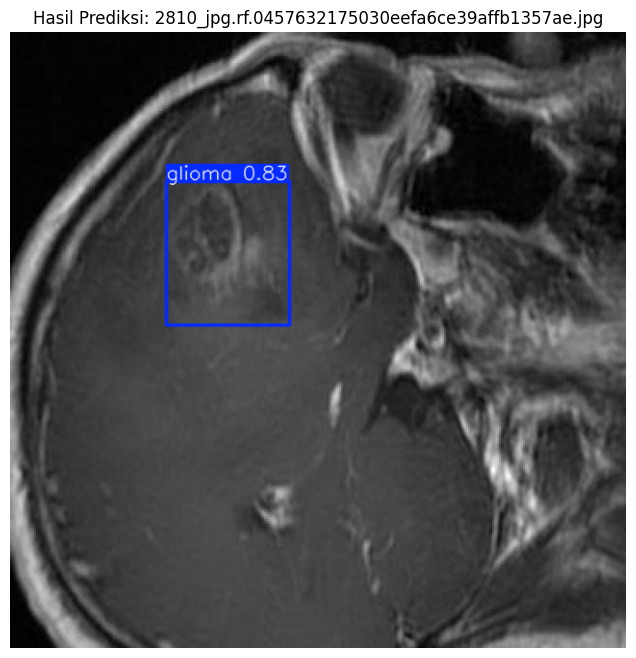


image 1/1 D:\ProjectAkhir_PCD\BrainTumorYolov11\test\images\10_jpg.rf.efaf1af26de11dabdda3214f4457c931.jpg: 256x256 1 meningioma, 215.7ms
Speed: 1.5ms preprocess, 215.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 256)


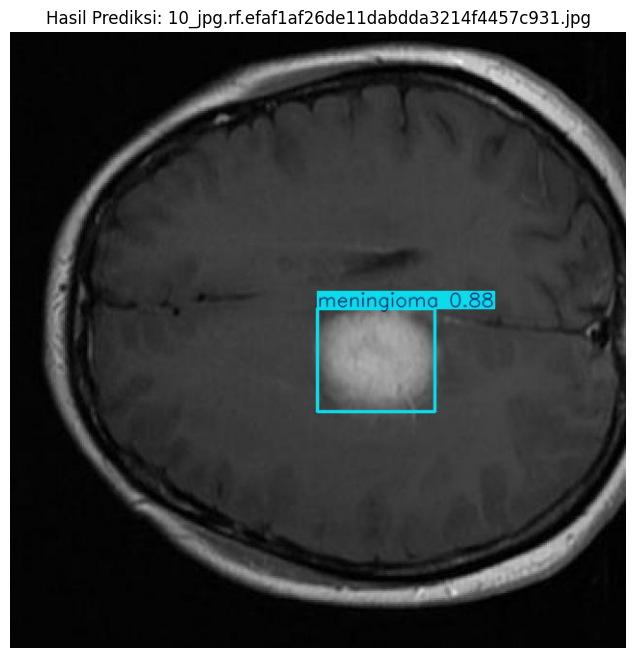


image 1/1 D:\ProjectAkhir_PCD\BrainTumorYolov11\test\images\1779_jpg.rf.bee72974d8b5297aab3f9aefa61e78a9.jpg: 256x256 1 pituitary, 88.5ms
Speed: 0.7ms preprocess, 88.5ms inference, 4.4ms postprocess per image at shape (1, 3, 256, 256)


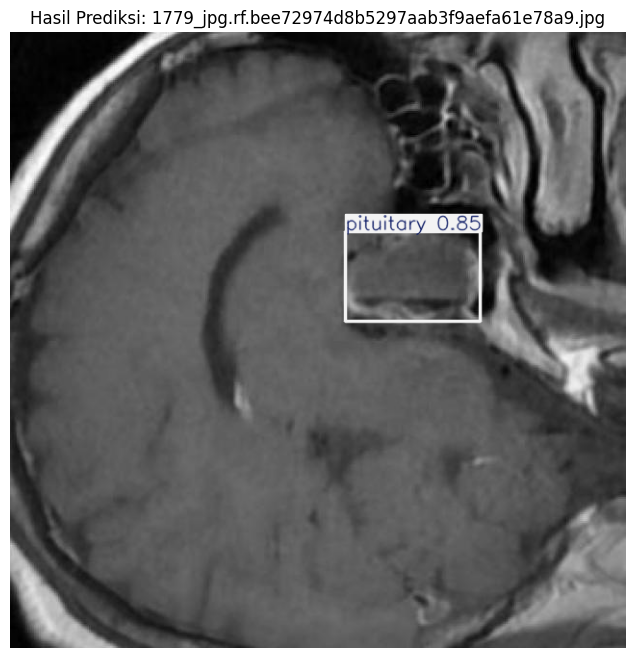

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO(r"train_augmented_5de0epoch2\weights\best.pt")
gambar_gambar = [
    r"BrainTumorYolov11\test\images\2810_jpg.rf.0457632175030eefa6ce39affb1357ae.jpg",
    r"BrainTumorYolov11\test\images\10_jpg.rf.efaf1af26de11dabdda3214f4457c931.jpg",
    r"BrainTumorYolov11\test\images\1779_jpg.rf.bee72974d8b5297aab3f9aefa61e78a9.jpg",
]

# Prediksi dan tampilkan hasilnya langsung
for path in gambar_gambar:
    results = model(path)
    img = results[0].plot()

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.title(f"Hasil Prediksi: {path.split('\\')[-1]}")
    plt.axis("off")
    plt.show()


 pada data test

In [ ]:
from ultralytics import YOLO
model = YOLO(r"train_augmented_5de0epoch2\weights\best.pt")
metrics = model.val(data=r"BrainTumorYolov11\data.yaml", split='test')


Ultralytics 8.3.133  Python-3.12.5 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 1.00.3 ms, read: 16.210.3 MB/s, size: 31.3 KB)


val: Scanning D:\ProjectAkhir_PCD\BrainTumorYolov11\test\labels... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:01<00:00, 193.01it/s]


val: New cache created: D:\ProjectAkhir_PCD\BrainTumorYolov11\test\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.51it/s]


                   all        308        308      0.854      0.846       0.91       0.66
                glioma        159        159      0.757      0.711      0.807      0.491
            meningioma         62         62      0.891      0.919      0.971      0.803
             pituitary         87         87      0.914      0.908      0.953      0.687
Speed: 0.4ms preprocess, 28.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val


**HASIL**

Hasil confusion matrik

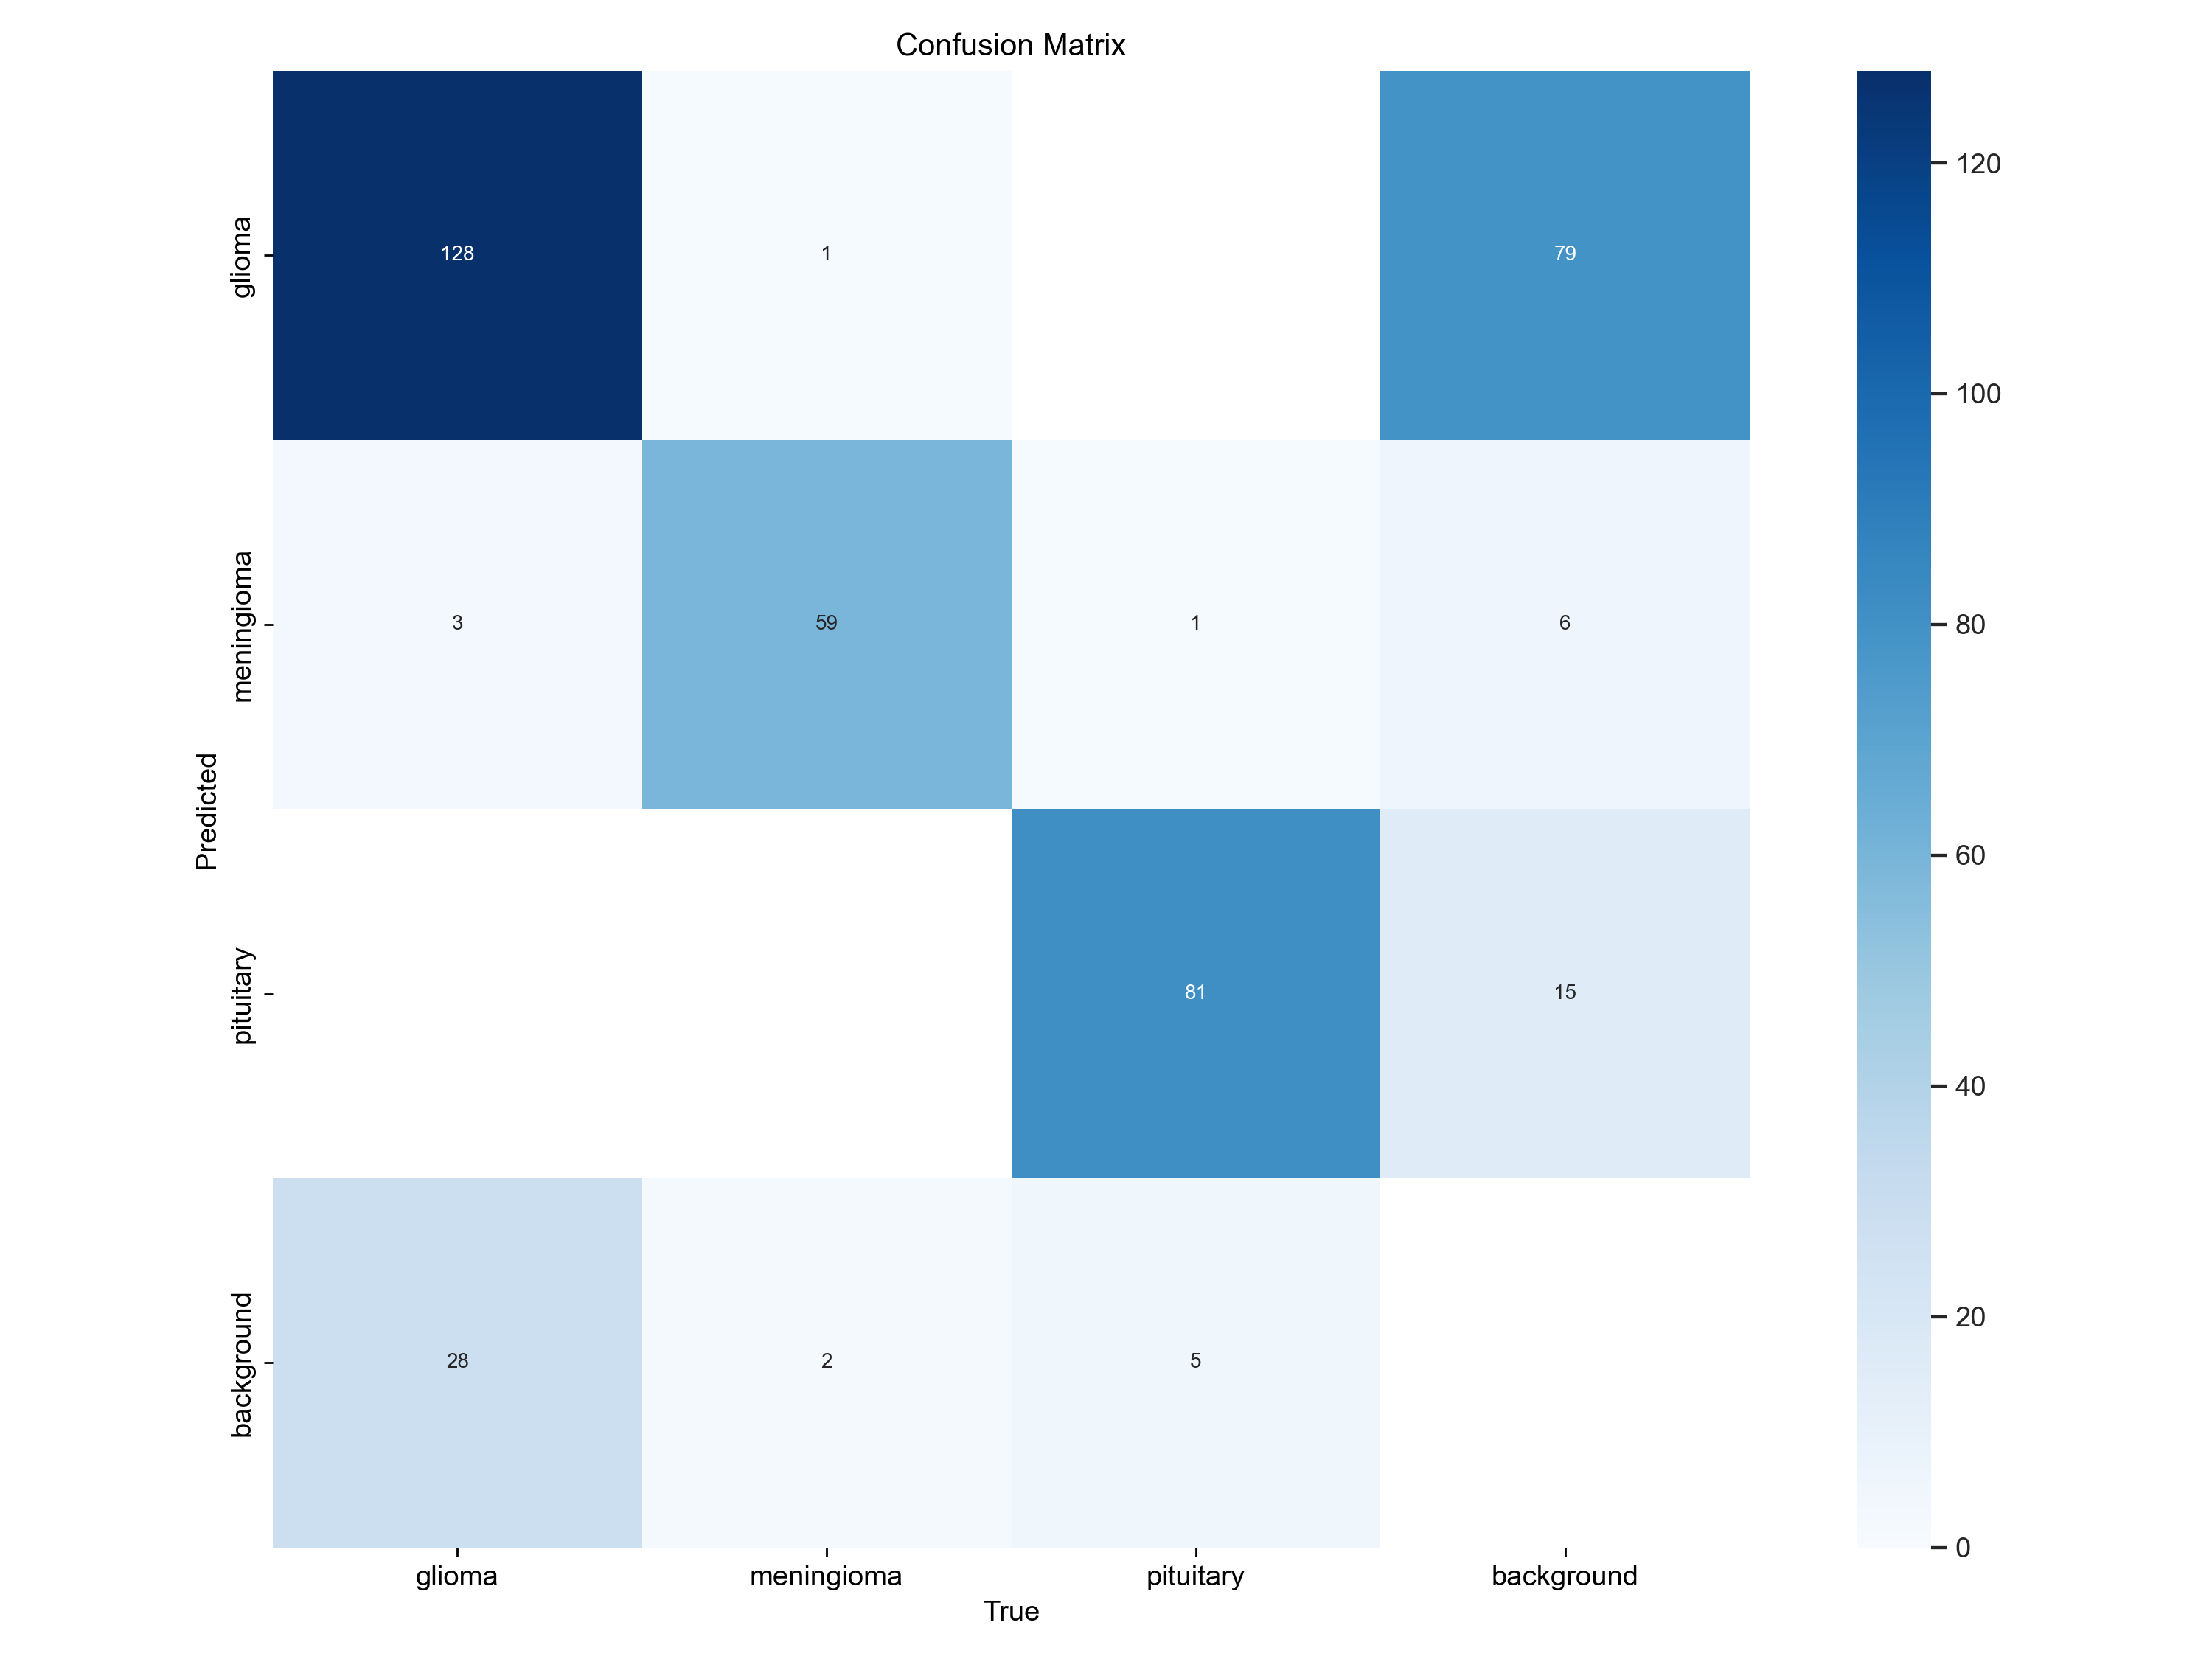

**Prediksi**
![image.png](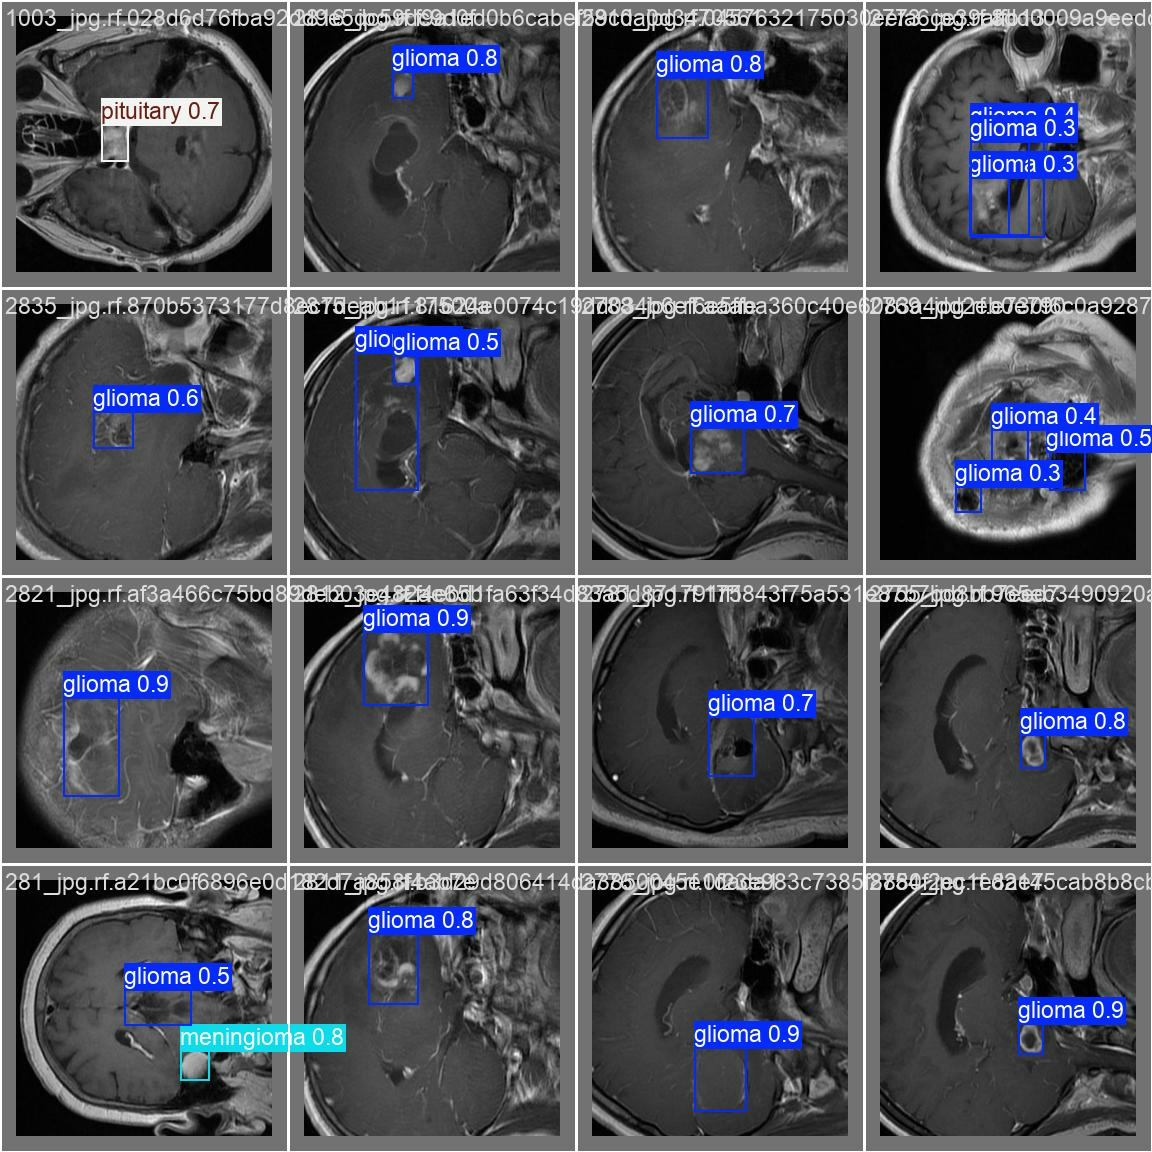
)

**Label**
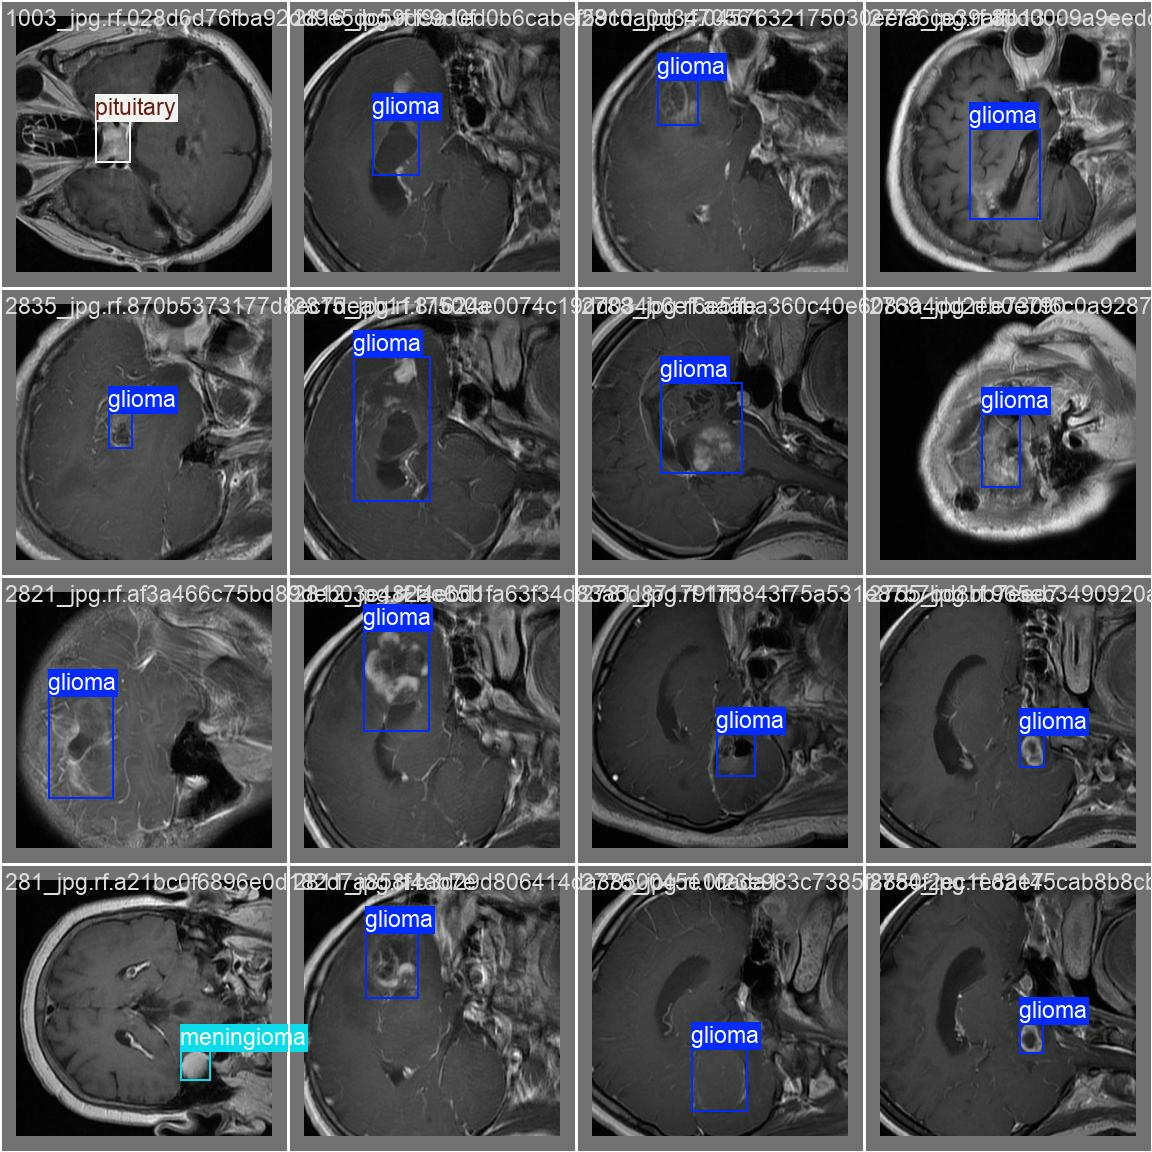